In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sci_notation
import os
import pandas as pd
from scipy import stats

In [4]:
savedir = '/home/knight/matar/NHB_submission_2017'
savefig = True

# across datasets
## by ROI

In [86]:
xlfilePath = (os.path.join(savedir, 'ROI_latencies_by_dataset.xlsx'))
onsets = pd.read_excel(xlfilePath, sheetname='onsets')
lats = pd.read_excel(xlfilePath, sheetname='peaks')
rts = pd.read_excel(xlfilePath, sheetname='rts')

onsets

	Sensory vs PFC
	u = 80.0, p = 6.93990356891e-08
	PFC vs Motor
	u = 595.0, p = 0.839618382793
latencies

	Sensory vs PFC
	u = 61.0, p = 1.37756095201e-08
	PFC vs Motor
	u = 450.0, p = 0.117850895021


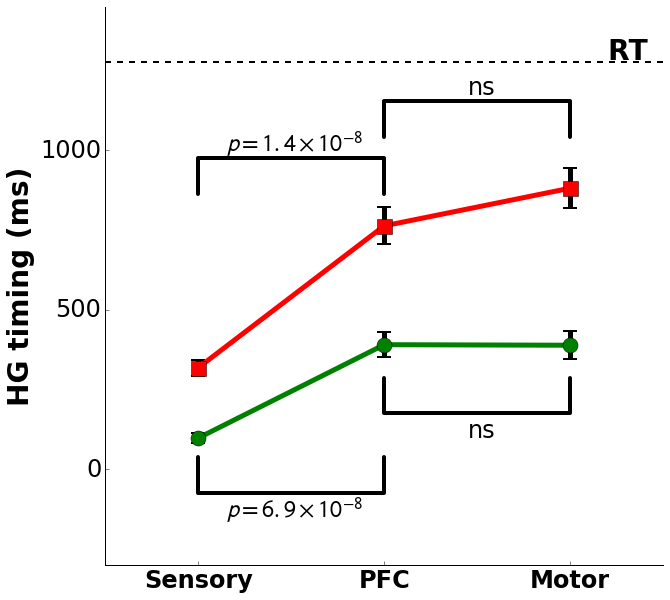

In [87]:
f,ax = plt.subplots(1, 1, figsize = (10,10))

ind = np.arange(3)
width = 0.35  

ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim([-.5, 2.5])
ax.yaxis.set_tick_params(labelsize = 24)
xTickMarks = ['Sensory', 'PFC', 'Motor']
ax.set_xticks([0,1,2])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
ax.set_ylim([-300, 1450])

x = range(3)

yerr = onsets.apply(lambda x: x.dropna().sem(), axis =0).values
y = onsets.mean(axis = 0).values

ax.errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax.plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')


ax.set_ylabel('HG timing (ms)',weight = 'bold', fontsize = 28)

yerr = lats.apply(lambda x: x.dropna().sem(), axis =0).values
y = lats.mean(axis = 0).values

ax.errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax.plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')

y = rts['Motor'].mean()
ax.axhline(y = y, lw = 2, color = 'k', ls = '--')
ax.annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')

# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-','shrinkA':20,'shrinkB':20,'lw':4}
propsB = {'connectionstyle':"bar,fraction=-0.3",'arrowstyle':'-','shrinkA':20,'shrinkB':20,'lw':4}

print ('onsets\n')
u, p =  stats.mannwhitneyu(onsets['Sensory'].dropna(), onsets['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(.15,-150), zorder = 10, fontsize = 24)
ax.annotate('', xy=(0, 100), xytext=(1,100), arrowprops=propsB)

u, p =  stats.mannwhitneyu(onsets['PFC'].dropna(), onsets['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
#ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,830), zorder = 10, fontsize = 24)
ax.annotate(r"%s" %('ns'), xy=(1.45,100), zorder = 10, fontsize = 24)
ax.annotate('', xy=(1, 350), xytext=(2,350), arrowprops=propsB)


print ('latencies\n')
u, p =  stats.mannwhitneyu(lats['Sensory'].dropna(), lats['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(.15,1000), zorder = 10, fontsize = 24)
ax.annotate('', xy=(0, 800), xytext=(1,800), arrowprops=props)

u, p =  stats.mannwhitneyu(lats['PFC'].dropna(), lats['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
# ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,1200), zorder = 10, fontsize = 24)
ax.annotate(r"%s" %('ns'), xy=(1.45,1175), zorder = 10, fontsize = 24)
ax.annotate('', xy=(1, 980), xytext=(2,980), arrowprops=props)

filename = os.path.join(savedir, 'Fig1_OnsetsAndLatencies_byROI_bydataset_singlefig.png')

plt.savefig(filename, bbox_inches='tight', dpi = 150)

## dominant pattern

In [89]:
xlfilePath = (os.path.join(savedir, 'ROI_HGtype_best_latencies_by_dataset.xlsx'))
onsets = pd.read_excel(xlfilePath, sheetname='onsets')
lats = pd.read_excel(xlfilePath, sheetname='peaks')

onsets

	Sensory vs PFC
	u = 31.0, p = 5.17903423062e-07
	PFC vs Motor
	u = 209.0, p = 0.00455617158137
latencies

	Sensory vs PFC
	u = 39.0, p = 1.29131848638e-06
	PFC vs Motor
	u = 109.0, p = 6.17133806139e-06


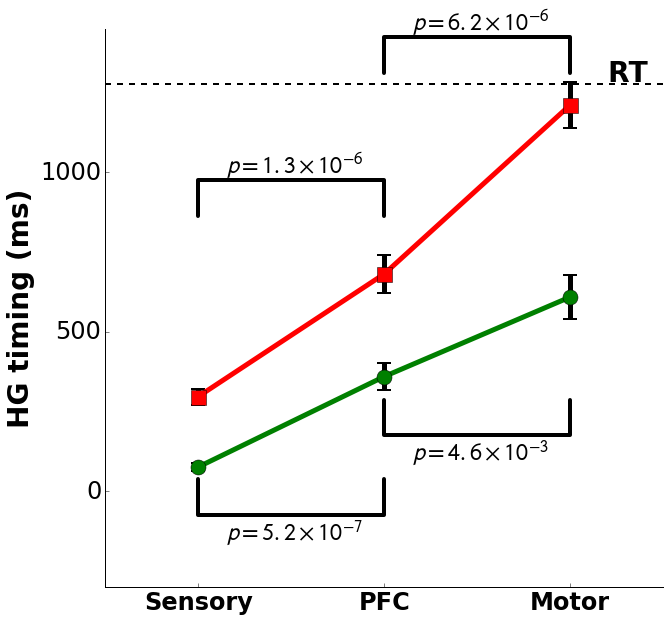

In [90]:
f,ax = plt.subplots(1, 1, figsize = (10,10))

ind = np.arange(3)
width = 0.35  

ax.patch.set_facecolor('white')
ax.autoscale(tight=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlim([-.5, 2.5])
ax.yaxis.set_tick_params(labelsize = 24)
xTickMarks = ['Sensory', 'PFC', 'Motor']
ax.set_xticks([0,1,2])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize = 24, weight = 'bold')
ax.set_ylim([-300, 1450])

x = range(3)

yerr = onsets.apply(lambda x: x.dropna().sem(), axis =0).values
y = onsets.mean(axis = 0).values

ax.errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax.plot(x, y, lw = 5, marker='o', color = 'green',  markersize =15, label = 'HG onsets')
ax.set_ylabel('HG timing (ms)',weight = 'bold', fontsize = 28)

yerr = lats.apply(lambda x: x.dropna().sem(), axis =0).values
y = lats.mean(axis = 0).values

ax.errorbar(x, y, yerr = yerr, fmt = 'o', linewidth = 5, c = 'black', capsize=7, capthick=2)
ax.plot(x, y, lw = 5, marker='s', color = 'red', markersize =15, label = 'HG peak latencies')

y = rts['Motor'].mean()
ax.axhline(y = y, lw = 2, color = 'k', ls = '--')
ax.annotate('RT', xy = (x[-1]+.2, y+7), fontsize = 28, weight = 'bold')

# #significance bars
props = {'connectionstyle':'bar','arrowstyle':'-','shrinkA':20,'shrinkB':20,'lw':4}
propsB = {'connectionstyle':"bar,fraction=-0.3",'arrowstyle':'-','shrinkA':20,'shrinkB':20,'lw':4}

print ('onsets\n')
u, p =  stats.mannwhitneyu(onsets['Sensory'].dropna(), onsets['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(.15,-150), zorder = 10, fontsize = 24)
ax.annotate('', xy=(0, 100), xytext=(1,100), arrowprops=propsB)

u, p =  stats.mannwhitneyu(onsets['PFC'].dropna(), onsets['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
# ax[0].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,830), zorder = 10, fontsize = 24)
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(1.15,100), zorder = 10, fontsize = 24)
ax.annotate('', xy=(1, 350), xytext=(2,350), arrowprops=propsB)


print ('latencies\n')
u, p =  stats.mannwhitneyu(lats['Sensory'].dropna(), lats['PFC'].dropna(), alternative='two-sided')
print('\tSensory vs PFC\n\tu = {0}, p = {1}'.format(u, p))
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(.15,1000), zorder = 10, fontsize = 24)
ax.annotate('', xy=(0, 800), xytext=(1,800), arrowprops=props)

u, p =  stats.mannwhitneyu(lats['PFC'].dropna(), lats['Motor'].dropna(), alternative='two-sided')
print('\tPFC vs Motor\n\tu = {0}, p = {1}'.format(u, p))
# ax[1].annotate(r"$p<$%s" %(sci_notation.sci_notation(p)), xy=(1.25,1200), zorder = 10, fontsize = 24)
ax.annotate(r"$p=$%s" %(sci_notation.sci_notation(p)), xy=(1.15,1450), zorder = 10, fontsize = 24)
ax.annotate('', xy=(1, 1250), xytext=(2,1250), arrowprops=props)

filename = os.path.join(savedir, 'Fig1_OnsetsAndLatencies_byROI_bydataset_singlefig_best.png')

plt.savefig(filename, bbox_inches='tight', dpi = 150)